In [1]:
import pandas as pd

In [2]:
df1 = pd.read_excel("Capital Not Deployed L12.xlsx")
df1.tail()

,Sr.No.,Accord Code,Company Name,BS_Share Capital,BS_Share Capital1,FH_Market Capitalization,Gross_Plus_CWIP,long term borrowing,Gross_Plus_CWIP1,long term borrowing1,CAPEX Growth,Debt Growth
0,1,132922,Edelweiss Financial Services Ltd.,75.6800,75.2030,2077.41600,10.1100,252.5470,11.7290,53.8330,-13.803393,369.130459
1,2,132424,Godrej Consumer Products Ltd.,34.0300,32.3600,16322.48950,1494.5200,235.3200,1468.6000,0.1400,1.764946,167985.714286
2,3,124000,Poonawalla Fincorp Ltd.,180.6116,172.8383,1425.83598,407.2307,2065.1716,389.6171,1020.7938,4.520746,102.310359


In [3]:
df1['Gross_Plus_CWIP_chg'] = ((df1['Gross_Plus_CWIP']/df1['Gross_Plus_CWIP1'])-1) * 100



#LOWER THE BETTER SO * -1
mean_value = df1['Gross_Plus_CWIP_chg'].mean()
std_dev = df1['Gross_Plus_CWIP_chg'].std()
df1['ZSCORE_CAPEX'] = ((df1['Gross_Plus_CWIP_chg']-mean_value) / std_dev) * (-1)


mean_value = df1['long term borrowing'].mean()
std_dev = df1['long term borrowing'].std()
df1['ZSCORE_DEBTGROWTH'] = (df1['long term borrowing']-mean_value) / std_dev


mean_value = df1['BS_Share Capital'].mean()
std_dev = df1['BS_Share Capital'].std()
df1['ZSCORE_SHARECAPITAL'] = (df1['BS_Share Capital']-mean_value) / std_dev


mean_value = df1['FH_Market Capitalization'].mean()
std_dev = df1['FH_Market Capitalization'].std()
df1['ZSCORE_MCAP'] = (df1['FH_Market Capitalization']-mean_value) / std_dev


df1.head()

,Sr.No.,Accord Code,Company Name,BS_Share Capital,BS_Share Capital1,FH_Market Capitalization,Gross_Plus_CWIP,long term borrowing,Gross_Plus_CWIP1,long term borrowing1,CAPEX Growth,Debt Growth,Gross_Plus_CWIP_chg,ZSCORE_CAPEX,ZSCORE_DEBTGROWTH,ZSCORE_SHARECAPITAL,ZSCORE_MCAP
0,1,132922,Edelweiss Financial Services Ltd.,75.6800,75.2030,2077.41600,10.1100,252.5470,11.7290,53.8330,-13.803393,369.130459,-13.803393,1.143417,-0.569139,-0.279266,-0.538220
1,2,132424,Godrej Consumer Products Ltd.,34.0300,32.3600,16322.48950,1494.5200,235.3200,1468.6000,0.1400,1.764946,167985.714286,1.764946,-0.432252,-0.585522,-0.830680,1.153836
2,3,124000,Poonawalla Fincorp Ltd.,180.6116,172.8383,1425.83598,407.2307,2065.1716,389.6171,1020.7938,4.520746,102.310359,4.520746,-0.711165,1.154662,1.109946,-0.615616


In [4]:
df2 = pd.read_excel("TRENDLYNE_230425.xlsx")
df2.head()

,Stock Name,NSE Code,BSE Code,Stock Code,ISIN,Industry Name,Current Price,Current Price.1,Market Capitalization,PE TTM Price to Earnings,...,Sector Return on Equity ROE,Industry Return on Equity ROE,RoA Annual %,Sector Return on Assets,Industry Return on Assets,Piotroski Score,sector_name,Industry Name.1,Latest financial result,Result Announced Date
0,20 Microns Ltd.,20MICRONS,533022.0,20MICRONS,INE144J01027,Coal & Mining,227.25,227.25,801.89,13.19,...,23.96,38.63,9.50,10.88,17.60,7.0,Metals & Mining,Coal & Mining,2024-12-31,2025-01-22
1,360 ONE Gold ETF,GOLD360,544375.0,GOLD360,INF579M01BB5,Others,95.45,95.45,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Others,Others,NaT,NaT
2,360 ONE Silver ETF,SILVER360,544389.0,SILVER360,INF579M01BC3,Others,99.20,99.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Others,Others,NaT,NaT
3,360 One Wam Ltd.,360ONE,542772.0,360ONE,INE466L01038,Capital Markets,1057.00,1057.00,41613.87,41.27,...,17.25,23.88,5.31,2.86,8.70,3.0,Banking and Finance,Capital Markets,2024-12-31,2025-04-23
4,3B BlackBio Dx Ltd.,NaN,532067.0,3BBLACKBIO,INE994E01018,Agrochemicals,1784.05,1784.05,1531.20,31.87,...,14.53,17.06,12.93,9.90,12.59,7.0,Chemicals & Petrochemicals,Agrochemicals,2024-12-31,2025-02-13


In [5]:
merged_df = pd.merge(df1, df2, how='inner', left_on='Company Name', right_on='Stock Name')
merged_df.head()

,Sr.No.,Accord Code,Company Name,BS_Share Capital,BS_Share Capital1,FH_Market Capitalization,Gross_Plus_CWIP,long term borrowing,Gross_Plus_CWIP1,long term borrowing1,...,Sector Return on Equity ROE,Industry Return on Equity ROE,RoA Annual %,Sector Return on Assets,Industry Return on Assets,Piotroski Score,sector_name,Industry Name.1,Latest financial result,Result Announced Date
0,1,132922,Edelweiss Financial Services Ltd.,75.6800,75.2030,2077.41600,10.1100,252.5470,11.7290,53.8330,...,17.25,20.92,0.98,2.86,14.05,8.0,Banking and Finance,Other Financial Services,2024-12-31,2025-02-07
1,2,132424,Godrej Consumer Products Ltd.,34.0300,32.3600,16322.48950,1494.5200,235.3200,1468.6000,0.1400,...,42.17,29.75,-3.03,19.26,17.43,4.0,FMCG,Personal Products,2024-12-31,2025-05-06
2,3,124000,Poonawalla Fincorp Ltd.,180.6116,172.8383,1425.83598,407.2307,2065.1716,389.6171,1020.7938,...,17.25,15.84,6.98,2.86,4.26,5.0,Banking and Finance,Finance (including NBFCs),2024-12-31,2025-04-25


In [6]:
df3 = pd.read_excel("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/L12 Valuation Data.xlsx")

final_merged_df = pd.merge(merged_df, df3, how='inner', left_on='Company Name', right_on='Company Name')
final_merged_df.head()

mean_value = final_merged_df['FR_Adjusted PE (x)'].mean()
std_dev = final_merged_df['FR_Adjusted PE (x)'].std()
final_merged_df['ZSCORE_PE'] = (final_merged_df['FR_Adjusted PE (x)']-mean_value) / std_dev

mean_value = final_merged_df['FR_EV/EBITDA(x)'].mean()
std_dev = final_merged_df['FR_EV/EBITDA(x)'].std()
final_merged_df['ZSCORE_EVEBITDA'] = (final_merged_df['FR_EV/EBITDA(x)']-mean_value) / std_dev

final_merged_df['ZSCORE_FINAL'] = ((1/5) * final_merged_df['ZSCORE_SHARECAPITAL']) + ((1/5) * final_merged_df['ZSCORE_DEBTGROWTH']) + ((1/5) * final_merged_df['ZSCORE_CAPEX']) + (0.2 * final_merged_df['ZSCORE_MCAP']) + (0.1 * final_merged_df['ZSCORE_PE']) + (0.1 * final_merged_df['ZSCORE_EVEBITDA'])
# final_merged_df['ZSCORE_FINAL'] = (1 * final_merged_df['ZSCORE_CAPEX'])



final_merged_df = final_merged_df[final_merged_df["ZSCORE_FINAL"]>0]

# final_merged_df['PORTFOLIO_WEIGHTS'] = final_merged_df["ZSCORE_FINAL"]/final_merged_df["ZSCORE_FINAL"].sum()

column_list = final_merged_df['Stock Code'].tolist()
# print(column_list)

final_merged_df.head()

final_merged_df.to_csv("rahul_s2l12.csv")

In [19]:
df = pd.read_csv("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/mega_dateclose_final.csv")
columns_to_keep = ['Date'] + [col for col in column_list if col in df.columns]
filtered_with_date_df = df[columns_to_keep]


filtered_with_date_df['Date'] = pd.to_datetime(filtered_with_date_df['Date'])
start_date = pd.to_datetime("2012-03-31")
end_date = pd.to_datetime("2015-04-02")
filtered_df = filtered_with_date_df[(filtered_with_date_df['Date'] >= start_date) & (filtered_with_date_df['Date'] <= end_date)]
filtered_df.head()


df_cleaned = filtered_df.dropna(how='all', subset=filtered_df.columns.difference(['Date']))
rows_removed = len(filtered_df) - len(df_cleaned)
# print("ROWS REMOVED i.e. ALL VALUES MISSING EXCEPT DATE:", rows_removed)
df_cleaned.head()


df_fully_cleaned = df_cleaned.dropna(axis=1)
final_columns = df_fully_cleaned.columns.tolist()
if 'Date' in final_columns:
    final_columns.remove('Date')
print(final_columns)
df_fully_cleaned.head()


df_fully_cleaned['Date'] = pd.to_datetime(df_fully_cleaned['Date'])
df_fully_cleaned.set_index('Date', inplace=True)
pct_change_df = df_fully_cleaned.pct_change() 
pct_change_df = pct_change_df.iloc[1:] 
pct_change_df.head()
# pct_change_df.to_csv("gptwork.csv",index=False)



pct_change_df = pct_change_df.reset_index()  # This moves 'Date' from index to a regular column
pct_change_df.head()
# pct_change_df.to_csv("data1.csv",index=False)





# pct_change_df.to_csv("deletenow.csv",index=False)
# nan_counts = pct_change_df.isna().sum()
# print(nan_counts)
# columns_without_nans = df.columns[df.isna().sum() == 0].tolist()
# print(columns_without_nans)

# pct_change_df.dropna

['EDELWEISS', 'POONAWALLA']


C:\Users\meets\AppData\Local\Temp\ipykernel_46008\2449854086.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_with_date_df['Date'] = pd.to_datetime(filtered_with_date_df['Date'])


,Date,EDELWEISS,POONAWALLA
0,2012-04-03,0.074653,0.012726
1,2012-04-04,-0.051696,0.003968
2,2012-04-09,-0.028961,-0.034256
3,2012-04-10,0.110526,-0.032060
4,2012-04-11,-0.047393,-0.013390


In [20]:
# PORTFOLIO WT CALCULATION

final_df = final_merged_df[final_merged_df['Stock Code'].isin([name.upper() for name in final_columns])]
final_df.head()

final_df['PORTFOLIO_WEIGHTS'] = final_df["ZSCORE_FINAL"]/final_df["ZSCORE_FINAL"].sum()
final_df.head()

final_df = final_df[["Stock Code","PORTFOLIO_WEIGHTS"]]
final_df.head(20)
# final_df.to_csv("data2.csv",index=False)

,Stock Code,PORTFOLIO_WEIGHTS
0,EDELWEISS,0.883547
2,POONAWALLA,0.116453


In [21]:
#DIRECT COPYPASTE - NO EDIT


# Align columns: ensure weights match the columns in the return dataframe
returns_df = pct_change_df.copy()
weights_df = final_df.set_index("Stock Code")["PORTFOLIO_WEIGHTS"]

# Ensure only common stocks are used
common_stocks = returns_df.columns.intersection(weights_df.index)
returns_matrix = returns_df[common_stocks].copy()
weights_vector = weights_df.loc[common_stocks]

# Perform matrix multiplication (dot product) for each date
returns_df["Portfolio Return"] = returns_matrix.dot(weights_vector)

# Show a few results
final_portfolio = returns_df[["Date", "Portfolio Return"]]
final_portfolio.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              743 non-null    datetime64[ns]
 1   Portfolio Return  743 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.7 KB


In [22]:
#DIRECT COPYPASTE - NO EDIT

df2 = pd.read_csv("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/BENCHMARK/BSE500_PCTRETURNS_09-25.csv")
df2['BDP_Date'] = pd.to_datetime(df2['BDP_Date'])

final_portfolio_benchmark = pd.merge(final_portfolio, df2, how='inner', left_on='Date', right_on='BDP_Date')
final_portfolio_benchmark = final_portfolio_benchmark.drop('BDP_Date', axis=1)
final_portfolio_benchmark.set_index('Date', inplace=True)
final_portfolio_benchmark = final_portfolio_benchmark.rename(columns={'Portfolio Return':'Strategy'})
final_portfolio_benchmark.head()
final_portfolio_benchmark.to_csv("s2l12b.csv")
# final_portfolio_benchmark.to_csv("final_portfolio_benchmarkQ.csv")

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2012-04-03   2012-04-03
End Period                 2015-04-01   2015-04-01
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          64.32%       126.43%
CAGR﹪                     12.13%       20.73%

Sharpe                     1.25         0.88
Prob. Sharpe Ratio         98.3%        93.97%
Smart Sharpe               1.24         0.87
Sortino                    1.82         1.47
Smart Sortino              1.81         1.47
Sortino/√2                 1.29         1.04
Smart Sortino/√2           1.28         1.04
Omega                      1.17         1.17

Max Drawdown               -16.59%      -39.55%
Longest DD Days            319          584
Volatility (ann.)          14.36%       40.94%
R^2                        0.17         0.17
Information Ratio          0.03         0.03
Calmar            

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2012-10-10,2013-11-26,2014-05-16,584,-39.551661,-36.288239
2,2014-06-26,2014-09-25,2015-01-19,208,-27.737513,-26.065805
3,2015-01-28,2015-03-27,2015-04-01,64,-21.231687,-20.270907
4,2012-07-06,2012-07-27,2012-10-01,88,-17.375799,-16.547056
5,2012-04-11,2012-05-22,2012-05-29,49,-14.268583,-13.855012


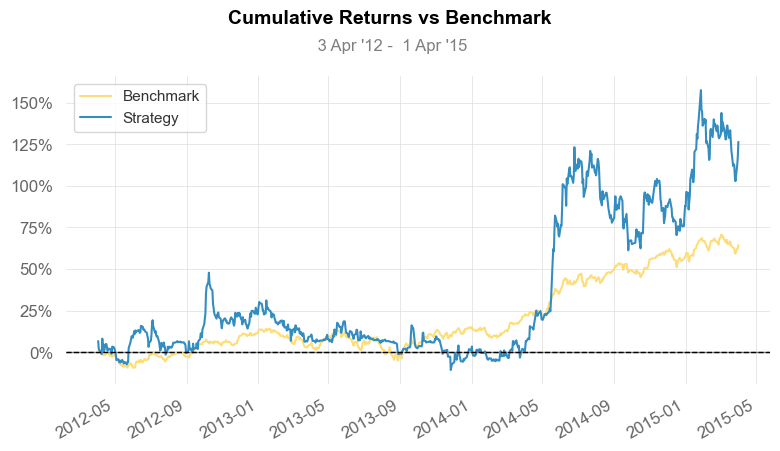

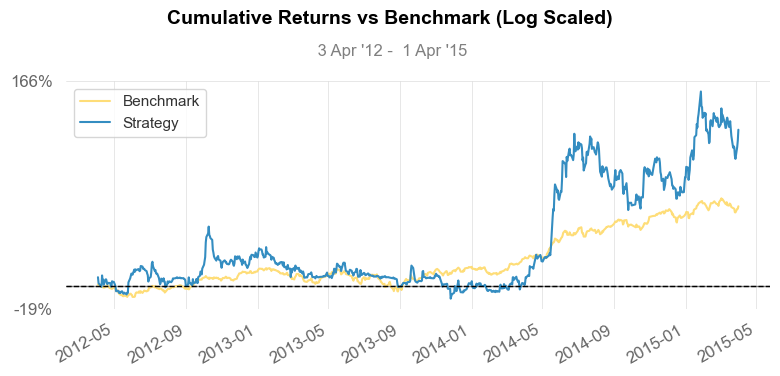

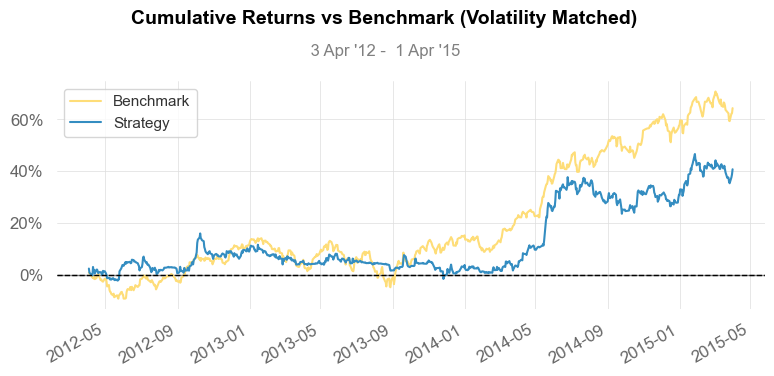

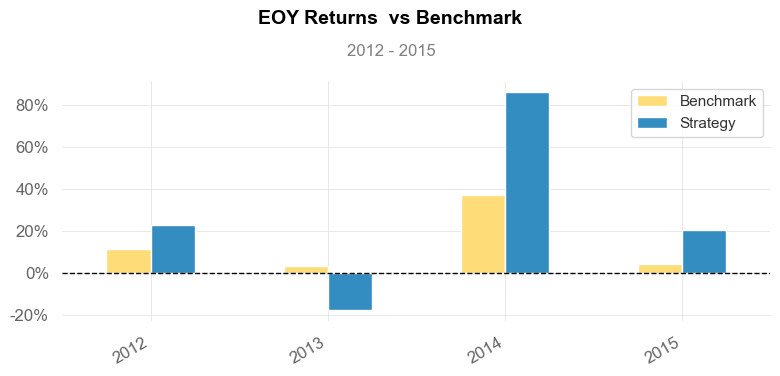

OptionError: No such keys(s): 'mode.use_inf_as_null'

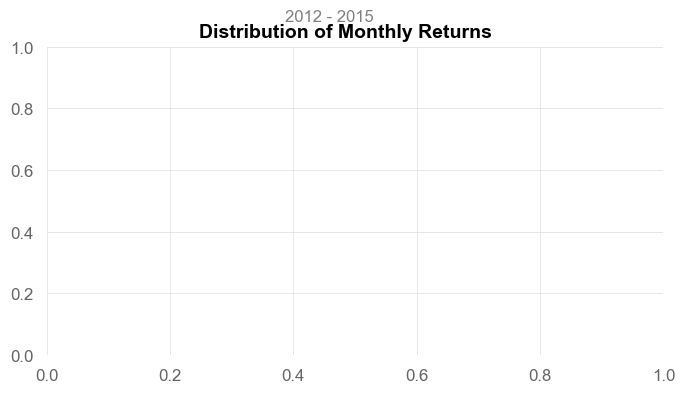

In [23]:
import quantstats as qs

final_portfolio_benchmark.index = pd.to_datetime(final_portfolio_benchmark.index)

qs.reports.full(final_portfolio_benchmark['Strategy'],benchmark = final_portfolio_benchmark['BDP_Close'],mode="full")